In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1766,spam,SMS AUCTION You have won a Nokia 7250i. This i...,NaN,NaN,NaN
7175,ham,I am trying,NaN,NaN,NaN
6300,spam,"Loan for any purpose Â£500 - Â£75,000. Homeown...",NaN,NaN,NaN
3536,ham,Mmmmm ... It was sooooo good to wake to your w...,NaN,NaN,NaN
3218,ham,Me too baby! I promise to treat you well! I be...,NaN,NaN,NaN


In [6]:
df.shape

(9343, 5)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9343 entries, 0 to 9342
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          9343 non-null   object
 1   v2          9342 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 365.1+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
6024,ham,Haf u found him? I feel so stupid da v cam was...
99,ham,Please don't text me anymore. I have nothing e...
5264,ham,"Storming msg: Wen u lift d phne, u say \HELLO\..."
1875,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...
4184,ham,I'm good. Have you registered to vote?


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
7009,spam,You have been selected to stay in 1 of 250 top...
86,ham,For real when u getting on yo? I only need 2 m...
6876,ham,Well i know Z will take care of me. So no worr...
6235,ham,Is xy going 4 e lunch?
217,ham,Easy ah?sen got selected means its good..


In [11]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# Drop rows with missing values
df = df.dropna()

# Verify if the missing value is removed
df.isnull().sum()


target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

1834

In [17]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(7508, 2)

## 2.EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    5887
1    1621
Name: count, dtype: int64

In [22]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


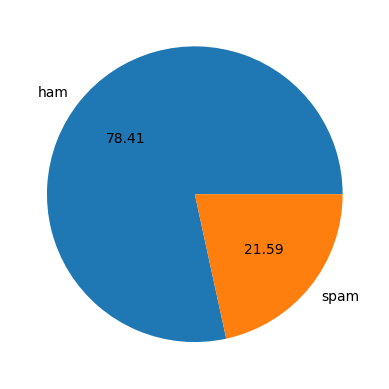

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [24]:
import nltk

In [25]:
!pip install nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#num of words 
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7508.000000,7508.000000,7508.000000
mean,88.664491,19.346697,1.994273
std,72.442691,15.086477,1.693622
min,1.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,67.000000,16.000000,1.000000
75%,136.250000,28.000000,3.000000
max,910.000000,220.000000,52.000000


In [34]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5887.000000,5887.000000,5887.000000
mean,71.347885,16.461016,1.708171
std,68.557395,14.736090,1.294060
min,1.000000,1.000000,1.000000
25%,32.000000,8.000000,1.000000
50%,50.000000,12.000000,1.000000
75%,88.000000,21.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1621.000000,1621.000000,1621.000000
mean,151.553362,29.826650,3.033313
std,46.845231,11.204945,2.414488
min,13.000000,1.000000,1.000000
25%,135.000000,25.000000,2.000000
50%,152.000000,29.000000,3.000000
75%,159.000000,32.000000,4.000000
max,635.000000,193.000000,52.000000


In [36]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

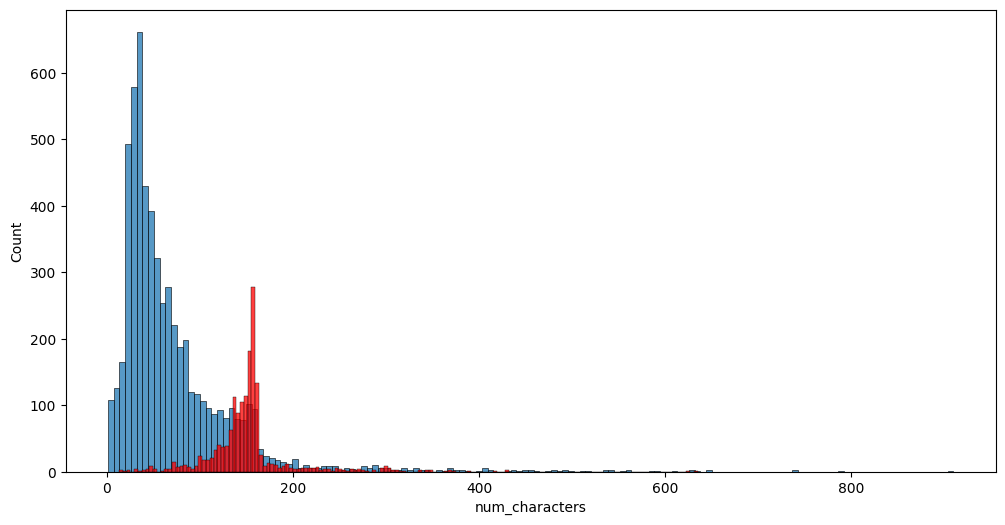

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

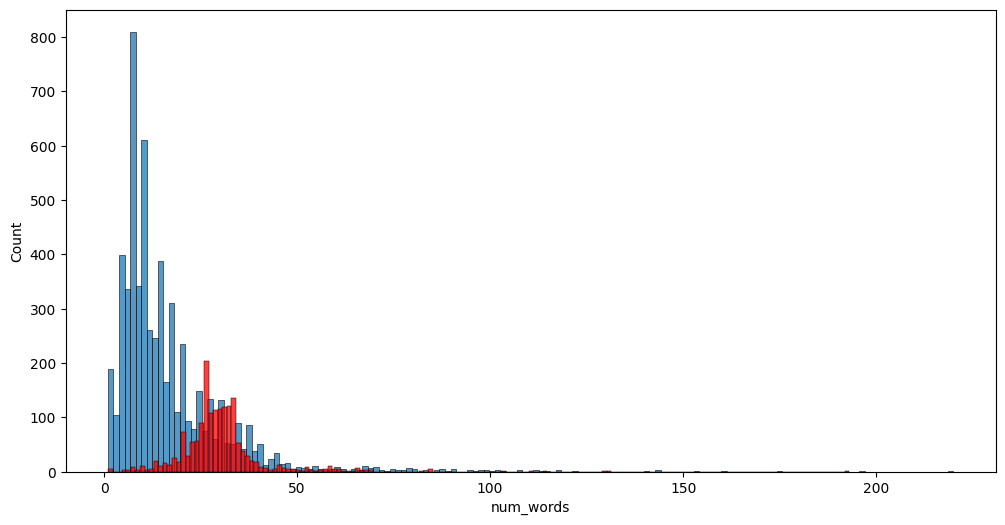

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

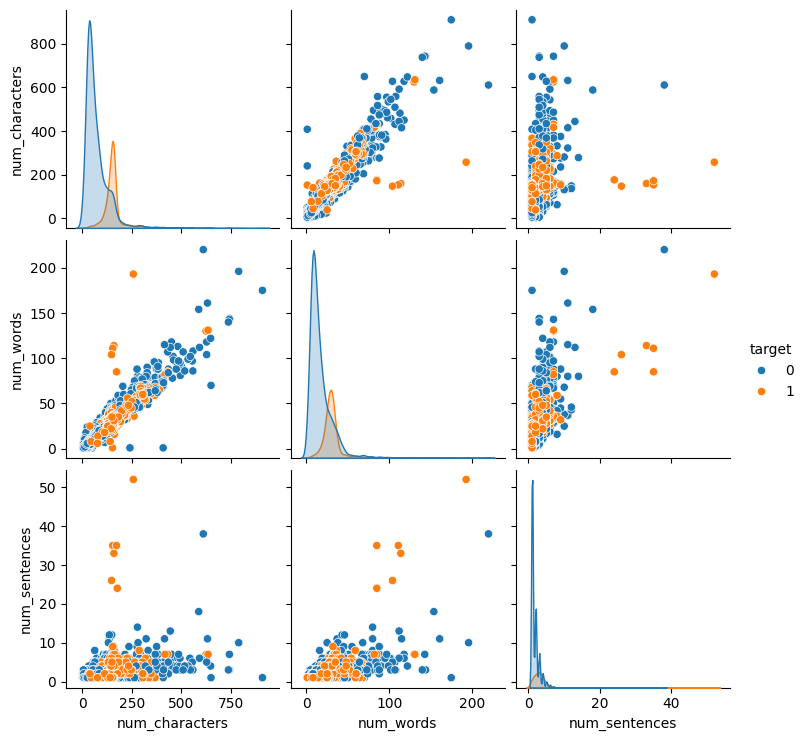

In [40]:
sns.pairplot(df,hue='target')

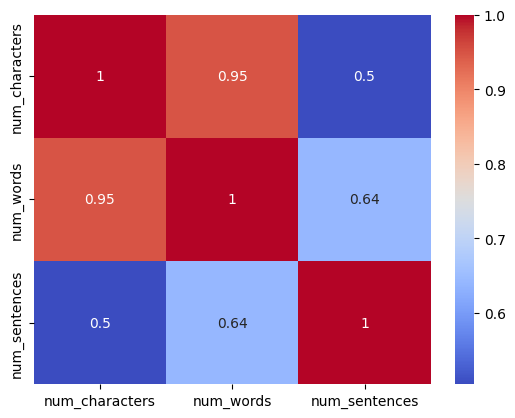

In [41]:
#sns.heatmap(df.corr(),annot=True)
import seaborn as sns
import matplotlib.pyplot as plt

# Check for numeric columns and calculate correlation
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Show the plot
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [42]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize the text
    
    y = []
    for i in text:
        if i.isalnum():  # Keep only alphanumeric tokens
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # Apply stemming
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

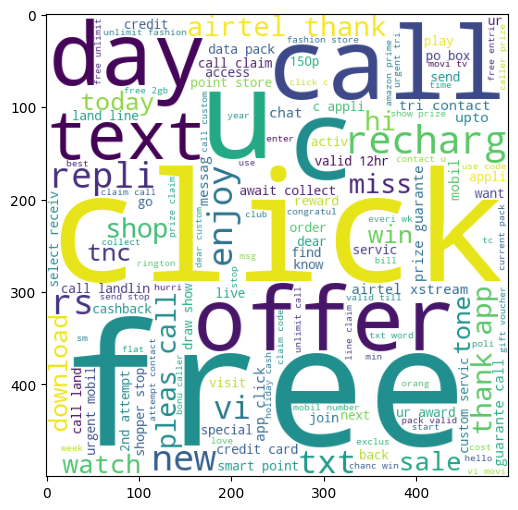

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

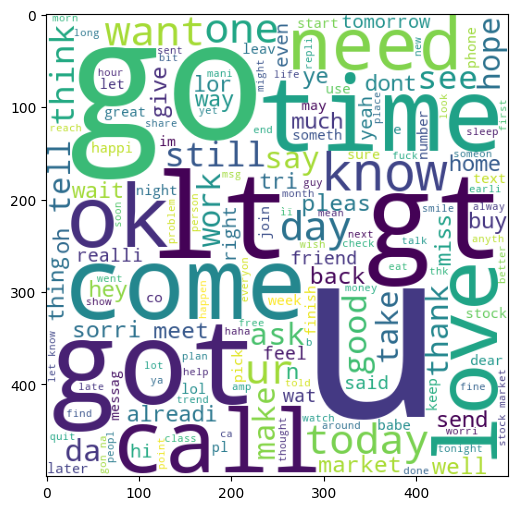

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [56]:
len(spam_corpus)

26050

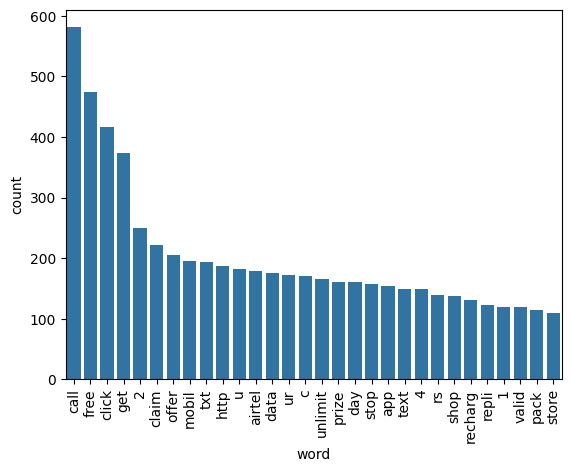

In [57]:
'''from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()'''
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame from the 30 most common words in the spam corpus
spam_corpus_common = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot the bar chart with explicit x and y arguments
sns.barplot(x='word', y='count', data=spam_corpus_common)

# Rotate the x-axis labels for better readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [58]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

45077

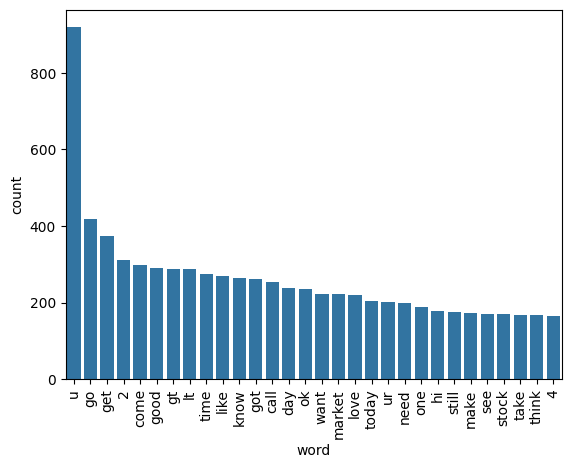

In [60]:
'''from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()'''
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get the 30 most common words from the ham corpus
ham_corpus_common = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Create the bar plot using seaborn
sns.barplot(x='word', y='count', data=ham_corpus_common)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [61]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=4500)

In [63]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [64]:
X.shape

(7508, 4500)

In [65]:
y = df['target'].values

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8082556591211718
[[931 266]
 [ 22 283]]
0.5154826958105647


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9693741677762983
[[1193    4]
 [  42  263]]
0.9850187265917603


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.978029294274301
[[1193    4]
 [  29  276]]
0.9857142857142858


In [73]:
# tfidf --> MNB

In [74]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [78]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [79]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.974034620505992, 0.9683098591549296)

In [80]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.974034620505992
Precision -  0.9683098591549296
For  KN
Accuracy -  0.8695073235685752
Precision -  1.0
For  NB
Accuracy -  0.9693741677762983
Precision -  0.9850187265917603
For  DT
Accuracy -  0.933422103861518
Precision -  0.9083665338645418
For  LR
Accuracy -  0.9527296937416777
Precision -  0.95
For  RF
Accuracy -  0.9813581890812251
Precision -  0.9928825622775801


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9620505992010653
Precision -  0.9397163120567376
For  BgC
Accuracy -  0.9707057256990679
Precision -  0.9306930693069307
For  ETC
Accuracy -  0.9800266311584553
Precision -  0.9858657243816255
For  GBDT
Accuracy -  0.9427430093209055
Precision -  0.9699570815450643
For  xgb
Accuracy -  0.9700399467376831
Precision -  0.9710144927536232


In [81]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [82]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.869507,1.000000
5,RF,0.981358,0.992883
8,ETC,0.980027,0.985866
2,NB,0.969374,0.985019
10,xgb,0.970040,0.971014
9,GBDT,0.942743,0.969957
0,SVC,0.974035,0.968310
4,LR,0.952730,0.950000
6,AdaBoost,0.962051,0.939716
7,BgC,0.970706,0.930693


In [83]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [84]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.869507
1,RF,Accuracy,0.981358
2,ETC,Accuracy,0.980027
3,NB,Accuracy,0.969374
4,xgb,Accuracy,0.970040
5,GBDT,Accuracy,0.942743
6,SVC,Accuracy,0.974035
7,LR,Accuracy,0.952730
8,AdaBoost,Accuracy,0.962051
9,BgC,Accuracy,0.970706


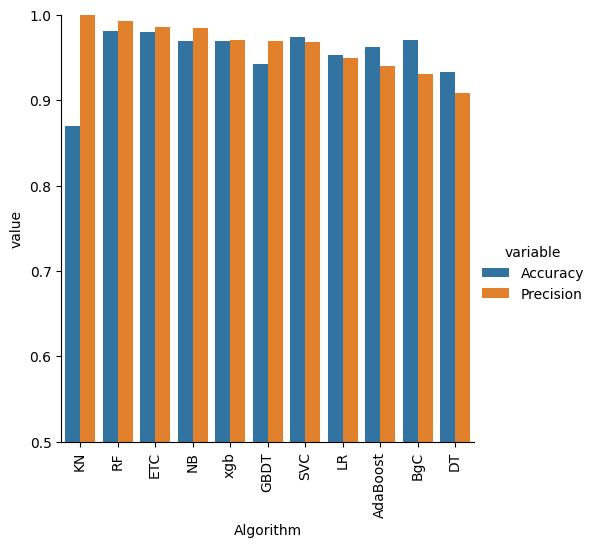

In [85]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [86]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [89]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [90]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [91]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [92]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.869507,1.000000,0.869507,1.000000,0.869507,1.000000,0.869507,1.000000
1,RF,0.981358,0.992883,0.981358,0.992883,0.981358,0.992883,0.981358,0.992883
2,ETC,0.980027,0.985866,0.980027,0.985866,0.980027,0.985866,0.980027,0.985866
3,NB,0.969374,0.985019,0.969374,0.985019,0.969374,0.985019,0.969374,0.985019
4,xgb,0.970040,0.971014,0.970040,0.971014,0.970040,0.971014,0.970040,0.971014
5,GBDT,0.942743,0.969957,0.942743,0.969957,0.942743,0.969957,0.942743,0.969957
6,SVC,0.974035,0.968310,0.974035,0.968310,0.974035,0.968310,0.974035,0.968310
7,LR,0.952730,0.950000,0.952730,0.950000,0.952730,0.950000,0.952730,0.950000
8,AdaBoost,0.962051,0.939716,0.962051,0.939716,0.962051,0.939716,0.962051,0.939716
9,BgC,0.970706,0.930693,0.970706,0.930693,0.970706,0.930693,0.970706,0.930693


In [101]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [102]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [103]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [104]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9846870838881492
Precision 0.993006993006993


In [97]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [98]:
from sklearn.ensemble import StackingClassifier

In [99]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [100]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9840213049267643
Precision 0.976271186440678


In [108]:
import pickle
pickle.dump(tfidf,open('vectorizer2.pkl','wb'))
pickle.dump(knc,open('model2.pkl','wb'))